In [2]:
import pennylane as qml
#from pennylane import numpy as np

import matplotlib.pyplot as plt
import qutip
from scipy.linalg import sqrtm

#Iris Data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from povm_clf import *

# #0 RDM of Iris Data on Bloch Sphere

In [2]:
iris_data = load_iris()

In [3]:
X = iris_data.data
#normalization
X =  X / np.linalg.norm(X, axis=1)[:, np.newaxis]
y = iris_data.target

In [152]:
np.linalg.norm(X[0])

0.9999999999999999

In [104]:
print(X[0])
psi = X[0].reshape(2,2)
print(psi)
rho_A = np.dot(psi.T, psi)

[0.80377277 0.55160877 0.22064351 0.0315205 ]
[[0.80377277 0.55160877]
 [0.22064351 0.0315205 ]]


# #1 One qubit

## 1-1. 
$\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$ <br>
$|+\rangle$ <br>
$\sin(\theta/2)|0\rangle + \cos(\theta/2)|1\rangle$

### State Preparation

In [3]:
theta = (0)*np.pi/8

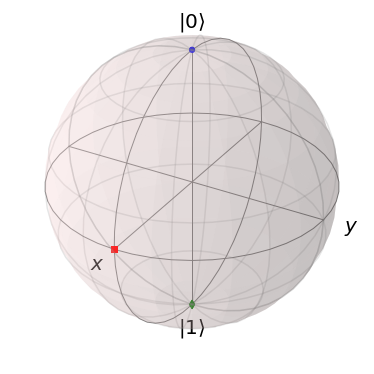

In [4]:
X_train = np.array([[np.cos(theta/2),np.sin(theta/2)],[1/np.sqrt(2),1/np.sqrt(2)],[np.sin(theta/2),np.cos(theta/2)]])

num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(3):
    bloch_sphere.add_points(np.array(state_2_bloch(X_train[i])).tolist())
bloch_sphere.show()

### Minimum Error Discrimination

In [5]:
val, E_opt = sdp_med(X_train, num_povm=3)
print('Optimal_val:',val)
povm_validity(E_opt)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.3333333312918939


,,E_0,,E_1,,E_2
POVM,1.00000+0.00000j,-0.00000+0.00000j,-0.00000+0.00000j,0.00000+0.00000j,0.00000+0.00000j,-0.00000+0.00000j
matrices,-0.00000+0.00000j,0.00000+0.00000j,0.00000+0.00000j,-0.00000+0.00000j,-0.00000+0.00000j,1.00000+0.00000j


,E_0,E_1,E_2
Hermicity,True,True,True
Positive-semidefinite,True,True,True
Completeness,True,,


Measure                           
              0        1       2 sum_probs
State 0 1.00000 -0.00000 0.00000   1.00000
      1 0.50000 -0.00000 0.50000   1.00000
      2 0.00000 -0.00000 1.00000   1.00000

State Fidelities 
 [[1.  0.5 0. ]
 [0.5 1.  0.5]
 [0.  0.5 1. ]]


#### cf. PGM probabilities

In [9]:
val, PGM_opt = pgm(a_priori_probs, init_rhos)
print('Optimal_val:',val)
povm_validity(PGM_opt)
display(dp_probs(X_train, PGM_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Optimal_val: 0.34763107293781714


,,E_0,,E_1,,E_2
POVM,0.72855,-0.12500,0.25000,0.25000,0.02145,-0.12500
matrices,-0.12500,0.02145,0.25000,0.25000,-0.12500,0.72855


,E_0,E_1,E_2
Hermicity,True,True,True
Positive-semidefinite,True,True,True
Completeness,True,,


Measure                          
              0       1       2 sum_probs
State 0 0.72855 0.25000 0.02145   1.00000
      1 0.25000 0.50000 0.25000   1.00000
      2 0.02145 0.25000 0.72855   1.00000

State Fidelities 
 [[1.  0.5 0. ]
 [0.5 1.  0.5]
 [0.  0.5 1. ]]


## 1-2.
$\cos\theta|0\rangle + \sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{2\pi/3}\sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{-2\pi/3}\sin\theta|1\rangle$

In [14]:
theta = (1)*np.pi/4

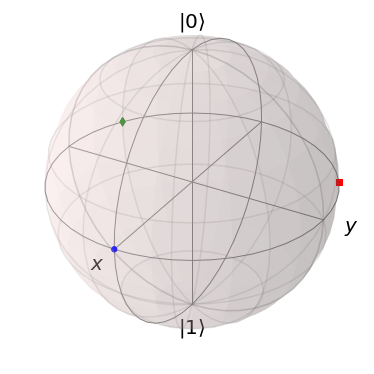

In [15]:
X_train = np.array([[np.cos(theta),np.sin(theta)],\
                    [np.cos(theta),np.exp(1j*2*np.pi/3)*np.sin(theta)],\
                    #[1,0]])
                    [np.cos(theta),np.exp((-1j)*2*np.pi/3)*np.sin(theta)]])

num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(3):
    bloch_sphere.add_points(np.array(state_2_bloch(X_train[i])).tolist())
bloch_sphere.show()

In [16]:
val, E_opt = sdp_med(X_train, num_povm=3)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.33333235460073674


,,E_0,,E_1,,E_2
POVM,0.33333+0.00000j,0.33333-0.00000j,0.33333+0.00000j,-0.16667+0.28868j,0.33333+0.00000j,-0.16667-0.28868j
matrices,0.33333+0.00000j,0.33333+0.00000j,-0.16667-0.28868j,0.33333+0.00000j,-0.16667+0.28868j,0.33333+0.00000j


,E_0,E_1,E_2
Hermicity,True,True,True
Positive-semidefinite,True,True,True
Completeness,True,,


Measure                          
              0       1       2 sum_probs
State 0 0.66667 0.16667 0.16667   1.00000
      1 0.16667 0.66667 0.16667   1.00000
      2 0.16667 0.16667 0.66667   1.00000

State Fidelities 
 [[1.   0.25 0.25]
 [0.25 1.   0.25]
 [0.25 0.25 1.  ]]


## 1-2-1. bloch vec 0.8 length

In [6]:
num_state=3

state_vecs = [[1/np.sqrt(2), np.exp(1j*2*np.pi/3)/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)], \
                [1/np.sqrt(2), np.exp(-1j*2*np.pi/3)/np.sqrt(2)]]
bloch_vecs = [state_2_bloch(state_vecs[i]) for i in range(num_state)]
bloch_vecs = [[0.8 * bloch_vecs[n][i] for i in range(3)] for n in range(num_state)]

init_rhos = [bloch_2_state(bloch_vecs[i], 'density') for i in range(num_state)]

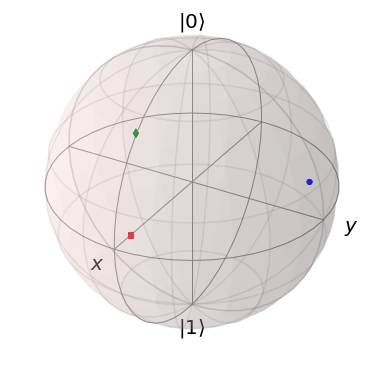

In [9]:
#dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(3):
    bloch_sphere.add_points(bloch_vecs[i])
bloch_sphere.show()

In [10]:
val, E_opt = sdp_med(X_train, num_povm=3)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

NameError: name 'X_train' is not defined

## 1-3.
$\cos\theta|0\rangle + \sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{2\pi/3}\sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{-2\pi/3}\sin\theta|1\rangle$ <br>
$|1\rangle$

In [2]:
theta = (1)*np.pi/16

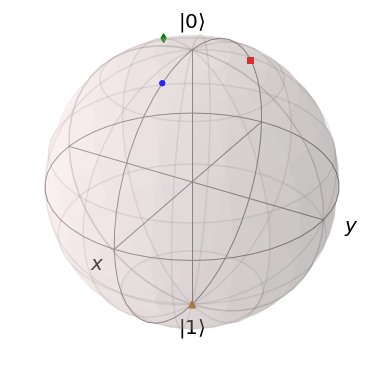

In [3]:
X_train = np.array([[np.cos(theta),np.sin(theta)],\
                    [np.cos(theta),np.exp(1j*2*np.pi/3)*np.sin(theta)],\
                    [np.cos(theta),np.exp((-1j)*2*np.pi/3)*np.sin(theta)],\
                    [0,1]])

num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(num_state):
    bloch_sphere.add_points(np.array(state_2_bloch(X_train[i])).tolist())
bloch_sphere.show()

In [4]:
val, E_opt = sdp_med(X_train, num_povm=num_state)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.4999942625345443


,,E_0,,E_1,,E_2,,E_3
POVM,0.33333+0.00000j,0.06630+0.00000j,0.33333+0.00000j,-0.03315+0.05742j,0.33333+0.00000j,-0.03315-0.05742j,0.00000+0.00000j,0.00000-0.00000j
matrices,0.06630-0.00000j,0.01318+0.00000j,-0.03315-0.05742j,0.01318+0.00000j,-0.03315+0.05742j,0.01318+0.00000j,0.00000+0.00000j,0.96046+0.00000j


,E_0,E_1,E_2,E_3
Hermicity,True,True,True,True
Positive-semidefinite,True,True,True,True
Completeness,True,,,


Measure                        
              0       1       2       3
State 0 0.34652 0.30846 0.30846 0.03656
      1 0.30846 0.34652 0.30846 0.03656
      2 0.30846 0.30846 0.34652 0.03656
      3 0.01318 0.01318 0.01318 0.96046

State Fidelities 
 [[1.         0.89016504 0.89016504 0.03806023]
 [0.89016504 1.         0.89016504 0.03806023]
 [0.89016504 0.89016504 1.         0.03806023]
 [0.03806023 0.03806023 0.03806023 1.        ]]


## 1-4.
$\cos\theta|0\rangle + \sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{1\pi/4}\sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{2\pi/4}\sin\theta|1\rangle$ <br>
$\cos\theta|0\rangle + e^{3\pi/4}\sin\theta|1\rangle$

In [2]:
theta = (4)*np.pi/16

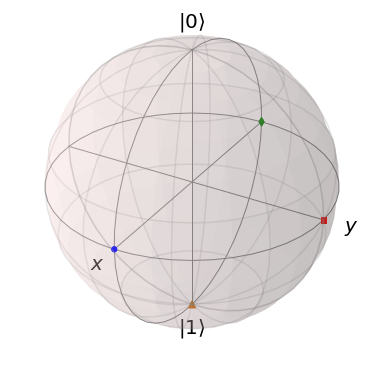

In [3]:
X_train = np.array([[np.cos(theta),np.sin(theta)],\
                    [np.cos(theta),np.exp(1j*1*np.pi/2)*np.sin(theta)],\
                    [np.cos(theta),np.exp(1j*2*np.pi/2)*np.sin(theta)],\
                    [0,1]])
                    #[np.cos(theta),np.exp(1j*3*np.pi/2)*np.sin(theta)]])

num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(num_state):
    bloch_sphere.add_points(np.array(state_2_bloch(X_train[i])).tolist())
bloch_sphere.show()

In [4]:
val, E_opt = sdp_med(X_train, num_povm=num_state)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.49999999704004594


,,E_0,,E_1,,E_2,,E_3
POVM,0.50000+0.00000j,0.50000-0.00000j,0.00000+0.00000j,0.00000+0.00000j,0.50000+0.00000j,-0.50000-0.00000j,-0.00000+0.00000j,0.00000-0.00000j
matrices,0.50000+0.00000j,0.50000+0.00000j,0.00000-0.00000j,0.00000+0.00000j,-0.50000+0.00000j,0.50000+0.00000j,0.00000+0.00000j,0.00000+0.00000j


,E_0,E_1,E_2,E_3
Hermicity,True,True,True,True
Positive-semidefinite,True,True,True,True
Completeness,True,,,


Measure                                   
               0       1        2       3 sum_probs
State 0  1.00000 0.00000 -0.00000 0.00000   1.00000
      1  0.50000 0.00000  0.50000 0.00000   1.00000
      2 -0.00000 0.00000  1.00000 0.00000   1.00000
      3  0.50000 0.00000  0.50000 0.00000   1.00000

State Fidelities 
 [[1.00000000e+00 5.00000000e-01 4.36188908e-32 5.00000000e-01]
 [5.00000000e-01 1.00000000e+00 5.00000000e-01 5.00000000e-01]
 [4.36188908e-32 5.00000000e-01 1.00000000e+00 5.00000000e-01]
 [5.00000000e-01 5.00000000e-01 5.00000000e-01 1.00000000e+00]]


## 1-5. Imitating the fidelities 

### 1-5-1. Three states made by averaging Iris data for each class

In [144]:
theta = (1)*np.pi/8
a, b = 2.75, -64

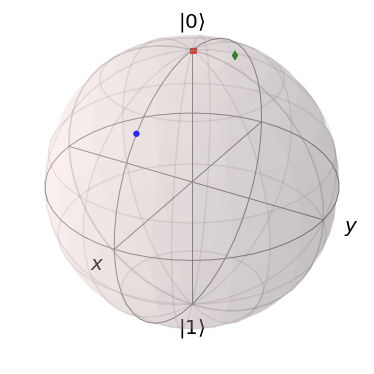

In [145]:
X_train = np.array([[np.cos(theta),np.sin(theta)],\
                    [np.cos(theta/b),np.exp((-1j)*2*np.pi/3)*np.sin(theta/b)],\
                    #[1,0]])
                    [np.cos(theta/a),np.exp(1j*2*np.pi/3)*np.sin(theta/a)]])

num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(0,3):
    bloch_sphere.add_points(np.array(state_2_bloch(X_train[i])).tolist())
bloch_sphere.show()

In [5]:
val, E_opt = sdp_med(X_train, num_povm=3)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.5137066390507892


,,E_0,,E_1,,E_2
POVM,0.36250+0.00000j,0.46198-0.13293j,0.00000+0.00000j,-0.00000+0.00000j,0.63750+0.00000j,-0.46198+0.13292j
matrices,0.46198+0.13293j,0.63750+0.00000j,-0.00000-0.00000j,0.00000+0.00000j,-0.46198-0.13292j,0.36250+0.00000j


,E_0,E_1,E_2
Hermicity,True,True,True
Positive-semidefinite,True,True,True
Completeness,True,,


Measure                
              0       1       2
State 0 0.72944 0.00000 0.27056
      1 0.36393 0.00000 0.63607
      2 0.27056 0.00000 0.72944

State Fidelities 
 [[1.         0.85569609 0.78942824]
 [0.85569609 1.         0.98057469]
 [0.78942824 0.98057469 1.        ]]


### 1-5-2. Adding a state

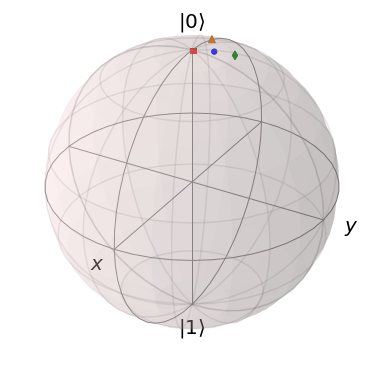

In [140]:
theta = (1)*np.pi/8
a, b = 2.75, -64
X_train = np.array([[np.cos(4*theta),np.sin(4*theta)],\
                    [np.cos(theta/b),np.exp((-1j)*2*np.pi/3)*np.sin(theta/b)],\
                    #[1,0]])
                    [np.cos(theta/a),np.exp(1j*2*np.pi/3)*np.sin(theta/a)]])

# Add a dummy state that has large fidelity between tho other states

all_avg = np.sum(X_train[1:], axis=0)
all_avg = all_avg / np.linalg.norm(all_avg)
bv = (+1) * np.array(state_2_bloch(all_avg))
all_avg = np.array(bloch_2_state(bv, output_type='vector'))
X_train[0] = all_avg

#X_train[0] = new_state
#print(X_train)
X_train = np.vstack((X_train, bloch_2_state(new_bv1, output_type='vector')))

num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * init_rhos[i] for i in range(num_state)]


#Bloch Sphere
bloch_sphere = qutip.Bloch()
for i in range(num_state):
    bloch_sphere.add_points(np.array(state_2_bloch(X_train[i])).tolist())
bloch_sphere.show()

In [9]:
val, E_opt = sdp_med(X_train, num_povm=num_state)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.7097645389839573


,,E_0,,E_1,,E_2,,E_3
POVM,-0.00001+0.00000j,-0.00000-0.00000j,0.38680+0.00000j,0.29201-0.15161j,0.30306+0.00000j,-0.01246+0.33173j,0.31015+0.00000j,-0.27955-0.18012j
matrices,-0.00000+0.00000j,-0.00001+0.00000j,0.29201+0.15161j,0.27986+0.00000j,-0.01246-0.33173j,0.36360+0.00000j,-0.27955+0.18012j,0.35655+0.00000j


,E_0,E_1,E_2,E_3
Hermicity,True,True,True,True
Positive-semidefinite,True,True,True,True
Completeness,True,,,


Measure                        
               0       1       2       3
State 0 -0.00001 0.34687 0.34687 0.30628
      1 -0.00001 0.38698 0.30651 0.30652
      2 -0.00001 0.30651 0.38698 0.30652
      3 -0.00001 0.30651 0.30651 0.38700

State Fidelities 
 [[1.         0.99511985 0.99511985 0.9853179 ]
 [0.99511985 1.         0.98057469 0.98057469]
 [0.99511985 0.98057469 1.         0.98057469]
 [0.9853179  0.98057469 0.98057469 1.        ]]


In [7]:
from sympy import *

vec_a, vec_b = state_2_bloch(X_train[1]), state_2_bloch(X_train[2])
ll = np.linalg.norm(np.array(vec_a) - np.array(vec_b))**2

x, y, z = symbols('x, y, z')
eq1 = Eq((x-vec_a[0])**2 + (y-vec_a[1])**2 + (z-vec_a[2])**2, ll)
eq2 = Eq((x-vec_b[0])**2 + (y-vec_b[1])**2 + (z-vec_b[2])**2, ll)
eq3 = Eq(x**2 + y**2 + z**2, 1)

sol = solve([eq1, eq2, eq3], [x, y, z])


new_bv1 = np.array([np.float64(sol[0][i]) for i in range(3)])
new_bv2 = np.array([np.float64(sol[1][i]) for i in range(3)])


# new bloch vector having the same distance
#X_train = np.vstack((X_train, bloch_2_state(new_bv1, output_type='vector')))

# #2 Two qubits

## 2-3. Three states obtained by averaging each class of Iris Data

In [5]:
import numpy as np

In [50]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

#preprocessing

X = np.exp(X/2)
X = affine_preprocessing(X)

iris_state_avg = []
for target_val in range(3):
    X_normalized = X[y == target_val] / np.linalg.norm(X[y == target_val], axis=1)[:,np.newaxis]
    

    iris_state_sum = np.zeros((4,4))
    for x in X_normalized:
        iris_state_sum += np.outer(x, x)
        #print(np.trace(iris_state_sum))

    iris_state_avg.append(iris_state_sum / len(X_normalized))



X_train = np.array(iris_state_avg)
num_state = len(X_train)
dim = len(X_train[0])

a_priori_probs = [1/num_state] * num_state
#init_rhos = [np.outer(X_train[i], np.conj(X_train[i])) for i in range(num_state)]
q_rho = [a_priori_probs[i] * iris_state_avg[i] for i in range(num_state)]

In [51]:
val, E_opt = sdp_med(X_train, num_povm=3)
print('Optimal_val:',val)
povm_validity(E_opt, atol=1e-5)
display(dp_probs(X_train, E_opt))
print('State Fidelities \n', fidelity_matrix(X_train))

Opt is Done. 
Status: optimal
Optimal_val: 0.3660156447968652


,,,,E_0,,,,E_1,,,,E_2
POVM,0.44859+0.00000j,-0.22782+0.00000j,0.33847+0.00000j,0.28441+0.00000j,0.00795+0.00000j,-0.07531+0.00000j,-0.03864+0.00000j,-0.02689+0.00000j,0.54345+0.00000j,0.30314+0.00000j,-0.29983+0.00000j,-0.25752+0.00000j
matrices,-0.22782+0.00000j,0.11570+0.00000j,-0.17190+0.00000j,-0.14444+0.00000j,-0.07531+0.00000j,0.71337+0.00000j,0.36595+0.00000j,0.25471+0.00000j,0.30314+0.00000j,0.17092+0.00000j,-0.19405+0.00000j,-0.11027+0.00000j
,0.33847+0.00000j,-0.17190+0.00000j,0.25539+0.00000j,0.21459+0.00000j,-0.03864+0.00000j,0.36595+0.00000j,0.18774+0.00000j,0.13067+0.00000j,-0.29983+0.00000j,-0.19405+0.00000j,0.55688+0.00000j,-0.34526+0.00000j
,0.28441+0.00000j,-0.14444+0.00000j,0.21459+0.00000j,0.18032+0.00000j,-0.02689+0.00000j,0.25471+0.00000j,0.13067+0.00000j,0.09095+0.00000j,-0.25752+0.00000j,-0.11027+0.00000j,-0.34526+0.00000j,0.72873+0.00000j


,E_0,E_1,E_2
Hermicity,True,True,True
Positive-semidefinite,True,True,True
Completeness,True,,


Measure                          
              0       1       2 sum_probs
State 0 0.77081 0.20537 0.02382   1.00000
      1 0.26332 0.61101 0.12568   1.00000
      2 0.26392 0.21594 0.52013   1.00000

State Fidelities 
 [[1.         0.63148763 0.41816886]
 [0.63148763 1.         0.52468701]
 [0.41816886 0.52468701 1.        ]]


---

$$ e^{XZ}=e^XZ $$

In [18]:
from scipy.linalg import expm

In [27]:
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

In [33]:
np.dot(expm(1j*sy), expm(1j*sy).T.conj())

tensor([[ 1.00000000e+00+0.j, -1.16841633e-16+0.j],
        [-1.16841633e-16+0.j,  1.00000000e+00+0.j]], requires_grad=True)

In [25]:
expm(np.dot(sx, sz))

array([[ 0.54030231, -0.84147098],
       [ 0.84147098,  0.54030231]])

In [26]:
np.dot(expm(sx), sz)

tensor([[ 1.54308063, -1.17520119],
        [ 1.17520119, -1.54308063]], requires_grad=True)